### Short Strangle Strats

In this <a href="https://www.python.org/doc/essays/blurb/">Python</a> notebook, we will dive into options hedging strategies named as Strangle strategies. 

A **Strangle** hedging strategy is an options trading strategy similar to the **Straddle**, with one key difference:
- In a Strangle, the options involved have **different strike prices**.
- Both options expire at the **same time**.

A Long Strangle involves:
1. Buying a Call option with a higher strike price.
2. Buying a Put option with a lower strike price.

$$
\text{Long Strangle} = P(S_t, t; K_1, T) + C(S_t, t; K_2, T) 
$$  

Where: 
- $P(S_t, t; K_1, T)$: The price of the put option of strike $K_1$ at time $t$. 
- $C(S_t, t; K_2, T)$: The price of the call option of strike $K_2$ at time $t$.   
- $S_t$: The underlying stock price at time $t$.  
- $K$: The strike price of the options.  
- $T$: The expiration date of the options.

A Short Strangle involves:
1. Selling a Call option with a higher strike price.
2. Selling a Put option with a lower strike price.

$$
\text{Short Strangle} = - P(S_t, t; K_1, T) - C(S_t, t; K_2, T) 
$$  

Where: 
- $P(S_t, t; K_1, T)$: The price of the put option of strike $K_1$ at time $t$. 
- $C(S_t, t; K_2, T)$: The price of the call option of strike $K_2$ at time $t$.   
- $S_t$: The underlying stock price at time $t$.  
- $K$: The strike price of the options.  
- $T$: The expiration date of the options.

Both options have:
- The same underlying asset.
- The same expiration date.

### Objective
The strategy profits from significant price movements of the underlying asset, either upward or downward, while limiting the initial cost compared to a Straddle.

To do so, we have to generate multiple scenarios of the underlying asset since its evolution is completely random . To generate such underlying monte_carlo simulations, we will use practical functions of the <a href="https://finance.math.upmc.fr/en/enseignements/1_2_probas_numeriques/">Numerical Probability</a> course from the master's degree <a href="https://finance.math.upmc.fr/en/">M2 Probabilités et Finance</a> taught by both <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> and <a href="https://perso.lpsm.paris/~vlemaire/site.html">Vincent Lemaire</a> . With their practical hands-on notebooks, we can easily see and plot various scenarios of underlying asset . 

Hence, we then run a notebook called `Monte_Carlo_Simulation.ipynb` where we can find all these functions . We will not provide these functions directly but you can easily implement them to well understand what's going on behind the scenes.

In [1]:
%run Monte_Carlo_Simulation.ipynb  # we run this notebook Monte_Carlo_Simulation 

We then provide all the necessary parameters the function `black_scholes_1d` which displays all the underlying asset scenarios. Here is the <a href="https://www.geeksforgeeks.org/python-docstrings/">docstring</a> of the function : 

The Black and Scholes Process is defined by the following <a href="https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Stochastic-Systems/SDE.pdf">Stochastic Differential Equation</a>

Let $S_t$ be the solution of the SDE on $[0,T]$
$$
    \operatorname{d}\!S_t = r S_t \operatorname{d}\!t + \sigma S_t \operatorname{d}\!B_t, \quad S_0 = x
$$
Then $S_t$ is given by : 
$$
    S_t = x \exp \bigl((r- \sigma^2/2) t + \sigma B_t \bigr)
$$


`black_scholes_1d` : Simulate paths of Black-Scholes process
-    Args:
       - n_times: Number of timesteps
       - n_paths: Number of paths 
       - final_time: Final time of simulation
       - init_value: `S0`
       - r: Interest rate
       - sigma: Volatility
       - random_state: `np.random.Generator` used for simulation
-    Returns:
       - `np.array` of shape `(n_times+1, n_paths)` containing the paths 
       
We then define the function parameters and plot our results to see what happens .

In [2]:
N = 5 
M = 500
S0 = 100
r, sigma = 0.1, 0.2
D = 0 
T = 1 
K_1 = 75
K_2 = 95
St = black_scholes_1d(N, M, init_value=S0, r=r, sigma=sigma) # Paths of BS Process

In [3]:
St[:10] # display the first 10 element of the underlying asset array 

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [108.98341175, 101.51299996,  95.61899159, ..., 107.66002101,
        102.74464873, 101.09820973],
       [125.02282018, 113.18420287,  82.92942331, ..., 112.76446894,
        106.23230422,  92.41230306],
       [112.23542225, 115.11501758,  87.77003105, ..., 119.25881255,
        108.82524951,  90.14866446],
       [132.04168851, 126.36729773,  75.98125793, ..., 105.41792151,
        108.11876781,  77.62617521],
       [130.34461373, 109.13370278,  71.79861176, ..., 118.70793788,
        115.60281018,  76.51663135]])

In [4]:
import seaborn as sns
sns.set_theme()

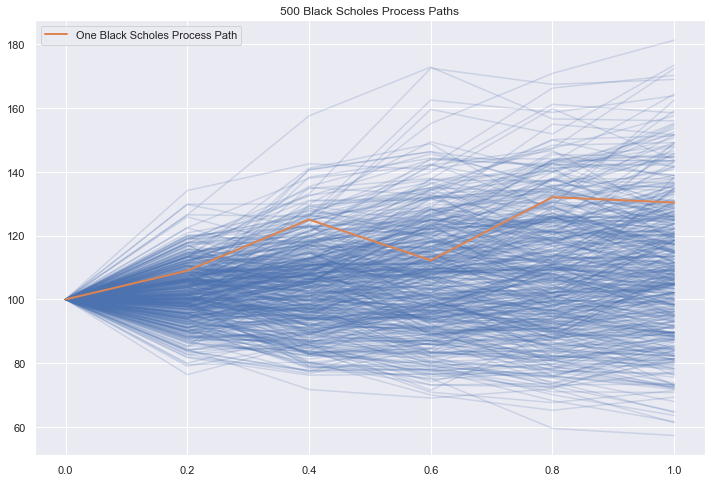

In [5]:
plt.figure(figsize=(12,8))
times = np.arange(N+1)*(T / N)
for S in St.T:
    sns.lineplot(x=times, y=S, color='C0', alpha=0.2)
ax = sns.lineplot(x=times, y=St[:,0], color='C1', lw=2, label='One Black Scholes Process Path')
ax.set(title=f"{M} Black Scholes Process Paths");

We can see in the preceding graph, 500 simulations of Black and Scholes Process. 

The next step is to store the last maturity time values of the BS process that is : Values of $S_t$ for which $t=T$ which is $1$ in our case . Why ? Because, we want to represent the <a href="https://www.math.fsu.edu/~paris/FMexam/DM%20Module%201.pdf">Payoff</a> of covered options strats and because the payoff is generally computed at the maturity for <a href="https://www.schwab.com/options/what-is-trading-options">options</a> . 

In [6]:
stock_prices = St.T[:,-1]  # We store the last values at the maturity T of our stock_prices vector 

We then <a href="https://www.geeksforgeeks.org/introduction-to-sorting-algorithm/">sort</a> our stock_prices vector in order to well represent the payoff since our simulations are purely random. To sort our vector, we used <a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html">`np.sort`</a> which has <a href="https://blog.finxter.com/how-to-sort-in-one-line/#:~:text=The%20runtime%20complexity%20of%20the,log(n))%20on%20average.">nlog(n)</a> complexity which the most efficient algorithm to sort tables in modern programming languages .

In [7]:
stock_prices = np.sort(stock_prices) # sort our stock_prices

### Short Strangle


A short Strangle is a hedging technique where, at time $t$: An investor sells a Put option $P(S_t, t; K_1, T)$ with strike price $K_1$ and simultaneously, the investor sells a Call option $C(S_t, t; K_2, T)$ with strike price $K_2$, $K_1$ < $K_2$ on the same stock $S_t$ and having the same expiry time $T$.


The value of the strategy at time $t$ is given by :
$$
\Pi_t = - P(S_t, t; K_1, T) - C(S_t, t; K_2, T)
$$


The payoff of this strategy at time $T$ is:
$$
\Psi(S_T) = - P(S_T, T; K_1, T) - C(S_T, T; K_2, T) = - \max(K_1 - S_T, 0) - \max(S_T - K_2, 0)= 
\begin{cases} 
S_T - K_1 & \text{if } S_T \leq K_1 \\
0 & \text{if } K_1 < S_T \leq K_2 \\
K_2 - S_T & \text{if }  S_T > K_2
\end{cases}
$$


The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= - P(S_T, T; K_1, T) - C(S_T, T; K_2, T) + P(S_t, t; K_1, t) + C(S_t, t; K_2, t)= 
\begin{cases} 
S_T - K_1 + P(S_t, t; K_2, T) + C(S_t,t; K_1, T) & \text{if } S_T \leq K_1 \\
+ P(S_t, t; K_2, T) + C(S_t,t; K_1, T) & \text{if } K_1 < S_T \leq K_2 \\
K_2 - S_T + P(S_t, t; K_2, T) + C(S_t,t; K_1, T) & \text{if } S_T \geq K_2
\end{cases}
$$


Before plotting the Profit diagram of the short strangle strategy, we have to compute the option premiums . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premiums of the corresponding options .

In [8]:
put_premium = EuropeanOptions(S0,K_1,T,sigma,r,D)
put_premium = put_premium.Put_Black_Scholes()
put_premium

0.16409354995595127

In [9]:
call_premium = EuropeanOptions(S0,K_2,T,sigma,r,D)
call_premium = call_premium.Call_Black_Scholes()
call_premium

16.438643820765407

After compute the option prices , then here is how we proceed to display the payoff and the profit of the long straddle strategy : 

- compute `short_call_payoff` : - maximum(`stock_prices` - `K_2`, 0)

- compute `short_put_payoff` : - maximum(`K_1` - `stock_prices`, 0)

- compute `short_strangle_payoff` : `short_call_payoff` + `short_put_payoff`

- Compute `short_call_profit` which is in fact the profit the investor can make only the first call option .  
`short_call_profit` = `short_call_payoff` + `call_premium` 

- Compute the `short_put_profit` which is in fact the profit earn only on the put option . `short_put_profit` = `short_put_payoff` + `put_premium`

- Compute the `short_strangle_profit`. 
`short_strangle_profit` = `short_call_profit` + `short_put_profit`

In [10]:
short_put_payoff = - np.maximum(K_1 - stock_prices, 0)
short_call_payoff = - np.maximum(stock_prices - K_2, 0)
short_strangle_payoff = short_put_payoff + short_call_payoff
short_call_profit = short_call_payoff + call_premium
short_put_profit = short_put_payoff + put_premium
short_strangle_profit = short_put_profit + short_call_profit

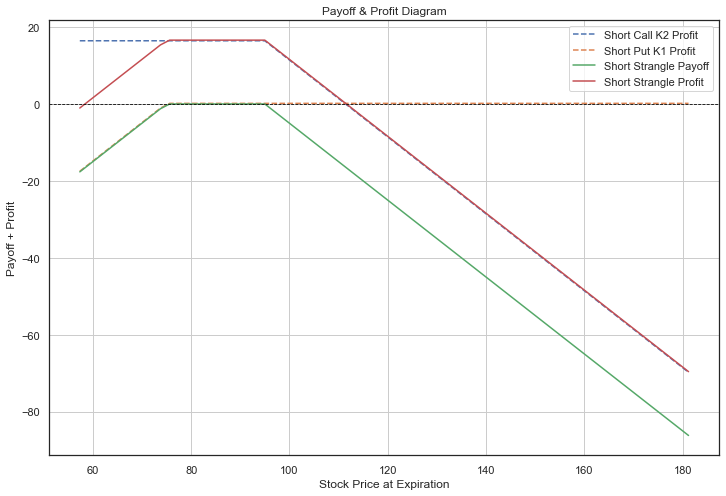

In [11]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, short_call_profit, label="Short Call K2 Profit", linestyle='--')
plt.plot(stock_prices, short_put_profit, label="Short Put K1 Profit", linestyle='--')
plt.plot(stock_prices, short_strangle_payoff, label="Short Strangle Payoff")
plt.plot(stock_prices, short_strangle_profit, label="Short Strangle Profit")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Payoff & Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Payoff + Profit")
plt.legend()
plt.grid()
plt.show()

### Short Strangle Greeks

It is a common asked question in quantitative finance interviews . We will compute ourselves greeks of the short strangle and thanks again to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> .

For illustrative purposes only, we will use the values of our stock at maturity $T$. And then we will plot all the common greeks of the short strangle.

In [12]:
delta_call = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
delta_call = delta_call.Delta_Call()

delta_put = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
delta_put = delta_put.Delta_Put()

delta_short_strangle = - delta_call - delta_put

In [13]:
gamma_call = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
gamma_call = gamma_call.Gamma_Call()

gamma_put = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
gamma_put = gamma_put.Gamma_Put()

gamma_short_strangle = - gamma_call - gamma_put

In [14]:
vega_call = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
vega_call = vega_call.Vega_Call()

vega_put = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
vega_put = vega_put.Vega_Put()

vega_short_strangle = - vega_call - vega_put

In [15]:
theta_call = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
theta_call = theta_call.Theta_Call()

theta_put = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
theta_put = theta_put.Theta_Put()

theta_short_strangle = - theta_call - theta_put

We then plot the greeks of the short strangle

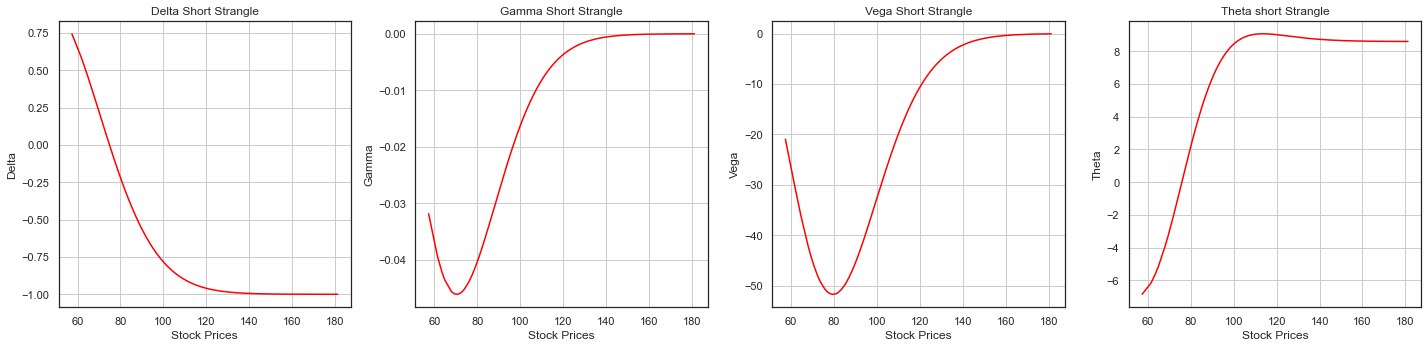

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

# Delta short Strangle
axes[0].plot(stock_prices, delta_short_strangle, c='red')
axes[0].set_title('Delta Short Strangle')
axes[0].set_xlabel('Stock Prices')
axes[0].set_ylabel('Delta')
axes[0].grid()

# Gamma short Strangle
axes[1].plot(stock_prices, gamma_short_strangle, c='red')
axes[1].set_title('Gamma Short Strangle')
axes[1].set_xlabel('Stock Prices')
axes[1].set_ylabel('Gamma')
axes[1].grid()

# Vega short Strangle
axes[2].plot(stock_prices, vega_short_strangle, c='red')
axes[2].set_title('Vega Short Strangle')
axes[2].set_xlabel('Stock Prices')
axes[2].set_ylabel('Vega')
axes[2].grid()

# Theta short Strangle
axes[3].plot(stock_prices, theta_short_strangle, c='red')
axes[3].set_title('Theta short Strangle')
axes[3].set_xlabel('Stock Prices')
axes[3].set_ylabel('Theta')
axes[3].grid()

# Adjust layout
plt.tight_layout()
plt.show()